In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
#Read train and test data
df_train = pd.read_csv('./Downloads/train.tsv', sep='\t', header = None)
df_test = pd.read_csv('./Downloads/test.tsv', sep='\t', header = None)

In [4]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [5]:
df_train.shape

(10240, 14)

In [6]:
df_test.shape

(1267, 14)

In [7]:
# Set 'y'
y_train = df_train[1]
y_train.unique()

array(['false', 'half-true', 'mostly-true', 'true', 'barely-true',
       'pants-fire'], dtype=object)

In [8]:
y_test = df_test[1]
y_test.unique()

array(['true', 'false', 'half-true', 'pants-fire', 'barely-true',
       'mostly-true'], dtype=object)

In [9]:
#Set 'x'
x_train = df_train[2]
x_test = df_test[2]
x_train.head()

0    Says the Annies List political group supports ...
1    When did the decline of coal start? It started...
2    Hillary Clinton agrees with John McCain "by vo...
3    Health care reform legislation is likely to ma...
4    The economic turnaround started at the end of ...
Name: 2, dtype: object

In [10]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(x_train)#values.astype('U')) 
tfidf_test = tfidf_vectorizer.transform(x_test)

In [11]:
#Scenario 1: True X all

In [12]:
y1_train = y_train.copy()
y1_test = y_test.copy()
y1_train[y1_train != 'true'] = 'false'
y1_test[y1_test != 'true'] = 'false'
y1_train.unique()

array(['false', 'true'], dtype=object)

In [13]:
#Randomforest classifier
RFclf = RandomForestClassifier()

accuracy:   0.819
Confusion matrix, without normalization


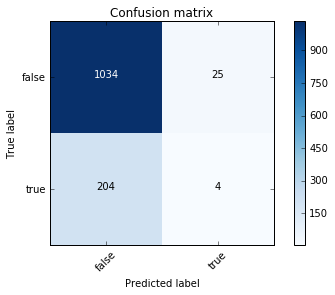

In [14]:
RFclf.fit(tfidf_train, y1_train)
pred = RFclf.predict(tfidf_test)
score = metrics.accuracy_score(y1_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y1_test, pred, labels=['false', 'true'])
plot_confusion_matrix(cm, classes=['false', 'true'])

In [15]:
#Linear Support Vector Classifier
svmclf = svm.LinearSVC()

accuracy:   0.814
Confusion matrix, without normalization


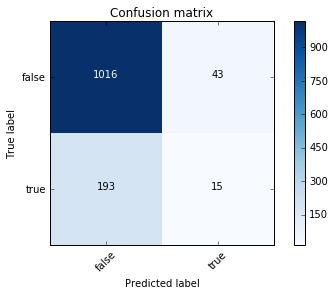

In [16]:
svmclf.fit(tfidf_train, y1_train)
pred = svmclf.predict(tfidf_test)
score = metrics.accuracy_score(y1_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y1_test, pred, labels=['false', 'true'])
plot_confusion_matrix(cm, classes=['false', 'true'])

In [17]:
#Scenario 2: (true + mostly true + half true) X all
y2_train = y_train.copy()
y2_test = y_test.copy()

y2_train[y2_train == 'half-true'] = 'true'
y2_train[y2_train == 'mostly-true'] = 'true'
y2_train[y2_train != 'true'] = 'false'

y2_test[y2_test == 'half-true'] = 'true'
y2_test[y2_test == 'mostly-true'] = 'true'
y2_test[y2_test != 'true'] = 'false'

accuracy:   0.590
Confusion matrix, without normalization


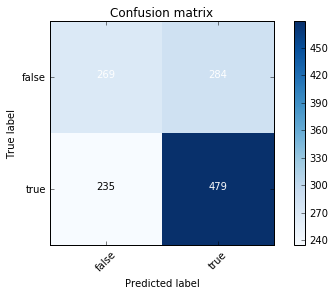

In [18]:
#Randomforest classifier
RFclf.fit(tfidf_train, y2_train)
pred = RFclf.predict(tfidf_test)
score = metrics.accuracy_score(y2_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y2_test, pred, labels=['false', 'true'])
plot_confusion_matrix(cm, classes=['false', 'true'])

accuracy:   0.602
Confusion matrix, without normalization


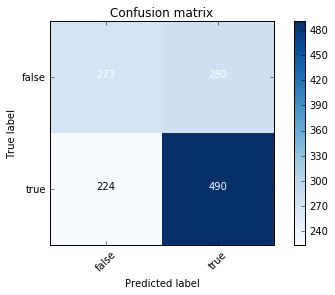

In [19]:
#Linear Support Vector Classifier
svmclf.fit(tfidf_train, y2_train)
pred = svmclf.predict(tfidf_test)
score = metrics.accuracy_score(y2_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y2_test, pred, labels=['false', 'true'])
plot_confusion_matrix(cm, classes=['false', 'true'])